In [553]:
import pandas as pd
import numpy as np
import seaborn as sns
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from mordred import Calculator, descriptors
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt
import umap.umap_ as umap
import umap.plot
from sklearn.cluster import SpectralClustering

In [554]:
df = pd.read_csv("data_compound.csv")
df

,sid,cid,smiles,bioactivity,type,value (nM)
0,316936203,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066
1,316936247,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083
2,316936221,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085
3,316936228,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088
4,316936201,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091
...,...,...,...,...,...,...
1629,336857410,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1630,336857410,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1631,336857473,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000
1632,336857473,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000


In [555]:
df_hist = df[['cid','smiles','bioactivity', 'type', 'value (nM)']]
df_hist

,cid,smiles,bioactivity,type,value (nM)
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091
...,...,...,...,...,...
1629,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1630,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1631,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000
1632,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000


In [556]:
df_hist = df_hist[df_hist["bioactivity"] != 'Unspecified']
df_hist

,cid,smiles,bioactivity,type,value (nM)
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091
...,...,...,...,...,...
1352,118159118,CC(C)NC1=NC2=C(CCN(C2)C(=O)C)N=C1N3CCN(CC3)CC4...,Inactive,IC50,362900.0000
1353,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0000
1354,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0000
1355,118159128,CC(=O)N1CCC2=C(C1)N=C(C(=N2)N3CCC(CC3)OC4=C(C=...,Inactive,IC50,603900.0000


In [557]:
IC50_only = df_hist[df_hist['type']=='IC50'].reset_index(drop=True)
IC50_only['pIC50'] = 9 - np.log10(IC50_only['value (nM)'])
IC50_only = IC50_only.drop_duplicates(keep='first', ignore_index=True)
IC50_only

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066,11.180456
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083,11.080922
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085,11.070581
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088,11.055517
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091,11.040959
...,...,...,...,...,...,...
579,118159281,CC(C)NC1=NC2=C(CCN(C2)C(=O)C3CC3)N=C1N4CCC(CC4...,Inactive,IC50,340200.0000,3.468266
580,118159155,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)S(=...,Inactive,IC50,341500.0000,3.466609
581,118159118,CC(C)NC1=NC2=C(CCN(C2)C(=O)C)N=C1N3CCN(CC3)CC4...,Inactive,IC50,362900.0000,3.440213
582,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0000,3.407823


In [558]:
df_active = IC50_only[IC50_only['bioactivity'] == 'Active'].reset_index(drop=True)
df_active

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066,11.180456
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083,11.080922
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085,11.070581
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088,11.055517
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091,11.040959
...,...,...,...,...,...,...
444,90038663,C1CC1NC2=NC3=C(C=C(C=C3)F)N=C2N4CCN(CC4)S(=O)(...,Active,IC50,9440.0000,5.025028
445,118159235,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)OC4...,Active,IC50,9500.0000,5.022276
446,155520163,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)OC4...,Active,IC50,9500.0000,5.022276
447,118159151,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(=...,Active,IC50,9800.0000,5.008774


In [559]:
df_inactive = IC50_only[IC50_only['bioactivity'] == 'Inactive'].reset_index(drop=True)
df_inactive

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159250,CC(C)NC1=NC2=C(CCN(C2)C(=O)N(C)C)N=C1N3CCC(CC3...,Inactive,IC50,10400.0,4.982967
1,118159264,CC1CC2=C(CN1S(=O)(=O)C)N=C(C(=N2)NCC(F)F)N3CCC...,Inactive,IC50,10400.0,4.982967
2,118159387,CC(C)NC1=NC2=C(CCN(C2)C=O)N=C1N3CCC(CC3)[C@@H]...,Inactive,IC50,11400.0,4.943095
3,118159394,CC(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(CC3)...,Inactive,IC50,11500.0,4.939302
4,118159402,CC(=O)N1CCC2=C(C1)N=C(C(=N2)NC3CCC3)N4CCC(CC4)...,Inactive,IC50,12000.0,4.920819
...,...,...,...,...,...,...
130,118159281,CC(C)NC1=NC2=C(CCN(C2)C(=O)C3CC3)N=C1N4CCC(CC4...,Inactive,IC50,340200.0,3.468266
131,118159155,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)S(=...,Inactive,IC50,341500.0,3.466609
132,118159118,CC(C)NC1=NC2=C(CCN(C2)C(=O)C)N=C1N3CCN(CC3)CC4...,Inactive,IC50,362900.0,3.440213
133,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0,3.407823


<Figure size 2000x2000 with 0 Axes>

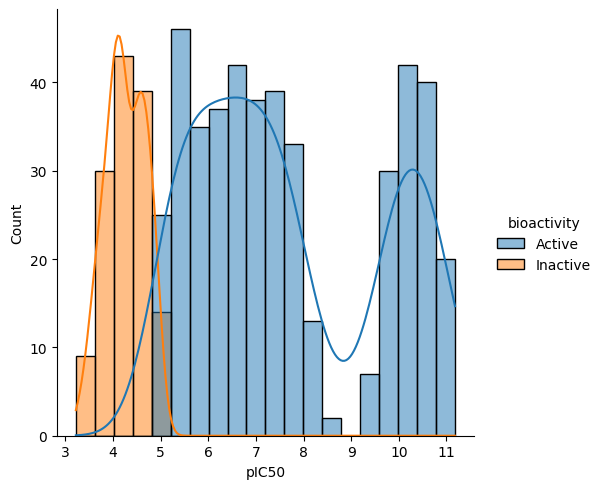

In [560]:
plt.figure(figsize=(20, 20))

sns.displot(IC50_only, bins=20, x='pIC50', hue='bioactivity', kde=True)
plt.show()

In [561]:
def canonical_smiles(smiles):
    mol_smiles = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mol_smiles]

    return smiles

In [562]:
CANNO_SMILES_active = canonical_smiles(df_active.smiles)
len(CANNO_SMILES_active)

449

In [563]:
CANNO_SMILES_inactive = canonical_smiles(df_inactive.smiles)
len(CANNO_SMILES_inactive)

135

In [564]:
df_active['smiles'] = CANNO_SMILES_active
df_active

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159182,CO[C@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc...,Active,IC50,0.0066,11.180456
1,118159176,CO[C@@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4cc...,Active,IC50,0.0083,11.080922
2,118159272,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(C(F)c4ccc(F)cc4F...,Active,IC50,0.0085,11.070581
3,118159276,CC(C)Nc1nc2c(nc1N1CCC(C(=O)c3cc(Cl)ccc3F)CC1)C...,Active,IC50,0.0088,11.055517
4,118159362,CN(C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc...,Active,IC50,0.0091,11.040959
...,...,...,...,...,...,...
444,90038663,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,Active,IC50,9440.0000,5.025028
445,118159235,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(Oc4ccc(F)cc4F)CC...,Active,IC50,9500.0000,5.022276
446,155520163,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(Oc4ccc(F)cc4F)CC...,Active,IC50,9500.0000,5.022276
447,118159151,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(C(=O)c4cc(Cl)ccc...,Active,IC50,9800.0000,5.008774


In [565]:
df_inactive['smiles'] = CANNO_SMILES_inactive
df_inactive

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159250,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,10400.0,4.982967
1,118159264,CC1Cc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc4F)CC3)nc2...,Inactive,IC50,10400.0,4.982967
2,118159387,CC(C)Nc1nc2c(nc1N1CCC([C@H](F)c3ccc(F)cc3F)CC1...,Inactive,IC50,11400.0,4.943095
3,118159394,CC(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc4F)C...,Inactive,IC50,11500.0,4.939302
4,118159402,COc1ccc(OC2CCN(c3nc4c(nc3NC3CCC3)CCN(C(C)=O)C4...,Inactive,IC50,12000.0,4.920819
...,...,...,...,...,...,...
130,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,340200.0,3.468266
131,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,Inactive,IC50,341500.0,3.466609
132,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,Inactive,IC50,362900.0,3.440213
133,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,391000.0,3.407823


In [566]:
active_compounds = []

for _, smiles, cid, bioactivity, pIC50 in df_active[['smiles','cid', 'bioactivity', 'pIC50']].itertuples():
    active_compounds.append((Chem.MolFromSmiles(smiles), cid, bioactivity, pIC50))
active_compounds[:5]

[(<rdkit.Chem.rdchem.Mol at 0x1353c216490>,
  118159182,
  'Active',
  11.18045606445813),
 (<rdkit.Chem.rdchem.Mol at 0x1353c2150e0>,
  118159176,
  'Active',
  11.080921907623926),
 (<rdkit.Chem.rdchem.Mol at 0x1353c217450>,
  118159272,
  'Active',
  11.070581074285707),
 (<rdkit.Chem.rdchem.Mol at 0x1353c215070>,
  118159276,
  'Active',
  11.05551732784983),
 (<rdkit.Chem.rdchem.Mol at 0x1353c217220>,
  118159362,
  'Active',
  11.040958607678906)]

In [567]:
inactive_compounds = []

for _, smiles, cid, bioactivity, pIC50 in df_inactive[['smiles', 'cid', 'bioactivity', 'pIC50']].itertuples():
    inactive_compounds.append((Chem.MolFromSmiles(smiles), cid, bioactivity, pIC50))
inactive_compounds[:5]

[(<rdkit.Chem.rdchem.Mol at 0x1353c3caf10>,
  118159250,
  'Inactive',
  4.982966660701219),
 (<rdkit.Chem.rdchem.Mol at 0x1353c3c9230>,
  118159264,
  'Inactive',
  4.982966660701219),
 (<rdkit.Chem.rdchem.Mol at 0x1353c3cb060>,
  118159387,
  'Inactive',
  4.943095148663527),
 (<rdkit.Chem.rdchem.Mol at 0x1353c3cab90>,
  118159394,
  'Inactive',
  4.939302159646388),
 (<rdkit.Chem.rdchem.Mol at 0x1353c3ca260>,
  118159402,
  'Inactive',
  4.920818753952375)]

In [568]:
active_compounds_structure = pd.DataFrame(active_compounds, columns=["Structure", "cid", "bioactivity", "pIC50"])
active_compounds_structure.head(5)

,Structure,cid,bioactivity,pIC50
0,<rdkit.Chem.rdchem.Mol object at 0x000001353C2...,118159182,Active,11.180456
1,<rdkit.Chem.rdchem.Mol object at 0x000001353C2...,118159176,Active,11.080922
2,<rdkit.Chem.rdchem.Mol object at 0x000001353C2...,118159272,Active,11.070581
3,<rdkit.Chem.rdchem.Mol object at 0x000001353C2...,118159276,Active,11.055517
4,<rdkit.Chem.rdchem.Mol object at 0x000001353C2...,118159362,Active,11.040959


In [569]:
inactive_compounds_structure = pd.DataFrame(inactive_compounds, columns=["Structure", "cid", "bioactivity", "pIC50"])
inactive_compounds_structure.head(5)

,Structure,cid,bioactivity,pIC50
0,<rdkit.Chem.rdchem.Mol object at 0x000001353C3...,118159250,Inactive,4.982967
1,<rdkit.Chem.rdchem.Mol object at 0x000001353C3...,118159264,Inactive,4.982967
2,<rdkit.Chem.rdchem.Mol object at 0x000001353C3...,118159387,Inactive,4.943095
3,<rdkit.Chem.rdchem.Mol object at 0x000001353C3...,118159394,Inactive,4.939302
4,<rdkit.Chem.rdchem.Mol object at 0x000001353C3...,118159402,Inactive,4.920819


In [570]:
#PandasTools.AddMoleculeColumnToFrame(IC50_only, 'smiles', 'Structure')
#PandasTools.RenderImagesInAllDataFrames(True)
#IC50_only.head(2)

In [571]:
def generate_mfpts(data):
    Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in data]
    return Mfpts

In [572]:
mfpts_active = generate_mfpts(active_compounds_structure.Structure[:])
print("Number of compounds converted:", len(mfpts_active))
print("Fingerprint length per compound:", len(mfpts_active[0]))

mfpts_inactive = generate_mfpts(inactive_compounds_structure.Structure[:])
print("Number of compounds converted:", len(mfpts_inactive))
print("Fingerprint length per compound:", len(mfpts_inactive[0]))


Number of compounds converted: 449
Fingerprint length per compound: 2048
Number of compounds converted: 135
Fingerprint length per compound: 2048


In [573]:
fp_name_active = [f'Bit_{i}' for i in range(2048)]
fp_bits_active = [list(l) for l in mfpts_active]

active_morganfp = pd.DataFrame(fp_bits_active, index=df_active.cid, columns=fp_name_active)
active_morganfp.head()

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
cid,,,,,,,,,,,,,,,,,,,,,
118159182,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118159176,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118159272,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118159276,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118159362,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [684]:
active_morganfp.to_csv("active_morganfp.csv")

In [687]:
df_morgan_active = pd.read_csv("active_morganfp.csv")
df_morgan_active

,cid,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,118159182,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118159176,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,118159272,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,118159276,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,118159362,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90038663,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
445,118159235,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,155520163,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,118159151,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [574]:
fp_name_inactive = [f'Bit_{i}' for i in range(2048)]
fp_bits_inactive = [list(l) for l in mfpts_inactive]

inactive_morganfp = pd.DataFrame(fp_bits_inactive, index=df_inactive.cid, columns=fp_name_inactive)
inactive_morganfp.head()

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
cid,,,,,,,,,,,,,,,,,,,,,
118159250,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118159264,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118159387,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118159394,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118159402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [686]:
inactive_morganfp.to_csv("inactive_morganfp.csv")

In [688]:
df_morgan_inactive = pd.read_csv("inactive_morganfp.csv")
df_morgan_inactive

,cid,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,118159250,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118159264,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,118159387,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,118159394,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,118159402,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,118159281,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,118159155,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,118159118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133,118159228,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [749]:
umapper = umap.UMAP(n_neighbors = 50, n_components = 2, random_state = 42) ####################################

In [750]:
active_umapper_morganfp = umapper.fit_transform(df_morgan_active.drop(columns = "cid"))

In [751]:
df_sc_active_mfptsfp = pd.concat([df_active, pd.DataFrame(active_umapper_morganfp)], axis=1)
for i in range(1, 3):
    df_sc_active_mfptsfp.rename(columns={df_sc_active_mfptsfp.columns[-i]: f'UMAP{3 - i}'}, inplace=True)


for k in range (1,6):
    active_sc = SpectralClustering(n_clusters = k, affinity ='nearest_neighbors')
    active_sc.fit(active_umapper_morganfp)
    df_sc_active_mfptsfp[f'SpectralCluster_{k}'] = active_sc.labels_
    
df_sc_active_mfptsfp

c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embeddin

,cid,smiles,bioactivity,type,value (nM),pIC50,UMAP1,UMAP2,SpectralCluster_1,SpectralCluster_2,SpectralCluster_3,SpectralCluster_4,SpectralCluster_5
0,118159182,CO[C@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc...,Active,IC50,0.0066,11.180456,7.104384,5.580070,0,0,2,2,0
1,118159176,CO[C@@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4cc...,Active,IC50,0.0083,11.080922,7.108141,5.601108,0,0,2,2,0
2,118159272,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(C(F)c4ccc(F)cc4F...,Active,IC50,0.0085,11.070581,11.133580,5.572524,0,0,0,0,2
3,118159276,CC(C)Nc1nc2c(nc1N1CCC(C(=O)c3cc(Cl)ccc3F)CC1)C...,Active,IC50,0.0088,11.055517,11.262423,4.669681,0,0,1,1,4
4,118159362,CN(C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc...,Active,IC50,0.0091,11.040959,7.556292,5.198700,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90038663,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,Active,IC50,9440.0000,5.025028,15.228480,13.619481,0,0,0,0,1
445,118159235,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(Oc4ccc(F)cc4F)CC...,Active,IC50,9500.0000,5.022276,9.300864,4.999849,0,0,1,1,3
446,155520163,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(Oc4ccc(F)cc4F)CC...,Active,IC50,9500.0000,5.022276,9.503070,5.012742,0,0,1,1,3
447,118159151,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(C(=O)c4cc(Cl)ccc...,Active,IC50,9800.0000,5.008774,11.324891,4.552161,0,0,1,1,4


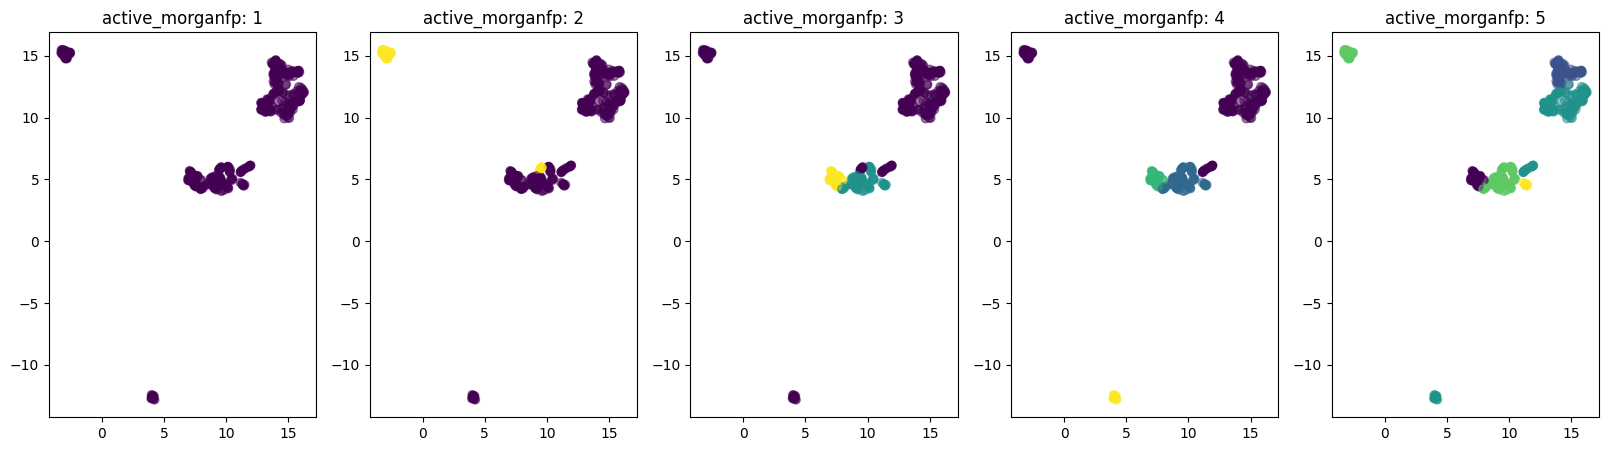

In [752]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df_sc_active_mfptsfp['UMAP1'], y=df_sc_active_mfptsfp['UMAP2'], c=df_sc_active_mfptsfp[f'SpectralCluster_{i}'], alpha=0.5)
    ax.set_title(f'active_morganfp: {i}')

In [753]:
active_compounds_2 = []

for _, smiles,cid in df_active[['smiles','cid']].itertuples():
    active_compounds_2.append((Chem.MolFromSmiles(smiles), cid))
active_compounds_2[:5]

[(<rdkit.Chem.rdchem.Mol at 0x1353b5afd80>, 118159182),
 (<rdkit.Chem.rdchem.Mol at 0x1353b5ac2e0>, 118159176),
 (<rdkit.Chem.rdchem.Mol at 0x1353b5aeff0>, 118159272),
 (<rdkit.Chem.rdchem.Mol at 0x1353b5ae8f0>, 118159276),
 (<rdkit.Chem.rdchem.Mol at 0x1353b5aedc0>, 118159362)]

In [754]:
inactive_compounds_2 = []

for _, smiles,cid in df_inactive[['smiles','cid']].itertuples():
    inactive_compounds_2.append((Chem.MolFromSmiles(smiles), cid))
inactive_compounds_2[:5]

[(<rdkit.Chem.rdchem.Mol at 0x13540efa570>, 118159250),
 (<rdkit.Chem.rdchem.Mol at 0x13540efb370>, 118159264),
 (<rdkit.Chem.rdchem.Mol at 0x13540ef9150>, 118159387),
 (<rdkit.Chem.rdchem.Mol at 0x13540ef8580>, 118159394),
 (<rdkit.Chem.rdchem.Mol at 0x13540ef9e70>, 118159402)]

In [755]:
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
active_rdkit_fingerprint = [rdkit_gen.GetFingerprint(mol) for mol, idx in active_compounds_2]

print("Number of compounds converted:", len(active_rdkit_fingerprint))
print("Fingerprint length per compound:", len(active_rdkit_fingerprint[0]))

Number of compounds converted: 449
Fingerprint length per compound: 2048


In [756]:
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
inactive_rdkit_fingerprint = [rdkit_gen.GetFingerprint(mol) for mol, idx in inactive_compounds_2]

print("Number of compounds converted:", len(inactive_rdkit_fingerprint))
print("Fingerprint length per compound:", len(inactive_rdkit_fingerprint[0]))

Number of compounds converted: 135
Fingerprint length per compound: 2048


In [757]:
fp_name_active = [f'Bit_{i}' for i in range(2048)]
fp_bits_active = [list(l) for l in active_rdkit_fingerprint]

active_rdkitfp = pd.DataFrame(fp_bits_active, index=df_active.cid, columns=fp_name_active)
active_rdkitfp.head()

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
cid,,,,,,,,,,,,,,,,,,,,,
118159182,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
118159176,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
118159272,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
118159276,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
118159362,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [758]:
active_rdkitfp.to_csv("active_rdkitfp.csv")

In [759]:
df_rdkit_active = pd.read_csv("active_rdkitfp.csv")
df_rdkit_active

,cid,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,118159182,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,118159176,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,118159272,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,118159276,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,118159362,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90038663,1,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
445,118159235,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
446,155520163,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
447,118159151,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [760]:
fp_name_inactive = [f'Bit_{i}' for i in range(2048)]
fp_bits_inactive = [list(l) for l in inactive_rdkit_fingerprint]

inactive_rdkitfp = pd.DataFrame(fp_bits_inactive, index=df_inactive.cid, columns=fp_name_inactive)
inactive_rdkitfp.head()

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
cid,,,,,,,,,,,,,,,,,,,,,
118159250,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
118159264,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
118159387,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
118159394,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
118159402,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [761]:
inactive_rdkitfp.to_csv("inactive_rdkitfp.csv")

In [762]:
df_rdkit_inactive = pd.read_csv("inactive_rdkitfp.csv")
df_rdkit_inactive

,cid,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,118159250,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,118159264,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,118159387,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,118159394,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,118159402,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,118159281,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
131,118159155,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
132,118159118,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
133,118159228,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [763]:
active_umapper_rdkitfp = umapper.fit_transform(df_rdkit_active.drop(columns = "cid"))

In [764]:
df_sc_active_rdkitfp = pd.concat([df_active, pd.DataFrame(active_umapper_rdkitfp)], axis=1)
for i in range(1, 3):
    df_sc_active_rdkitfp.rename(columns={df_sc_active_rdkitfp.columns[-i]: f'UMAP{3 - i}'}, inplace=True)


for k in range (1,6):
    active_sc = SpectralClustering(n_clusters = k, affinity ='nearest_neighbors')
    active_sc.fit(active_umapper_rdkitfp)
    df_sc_active_rdkitfp[f'SpectralCluster_{k}'] = active_sc.labels_
    
df_sc_active_rdkitfp

c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embeddin

,cid,smiles,bioactivity,type,value (nM),pIC50,UMAP1,UMAP2,SpectralCluster_1,SpectralCluster_2,SpectralCluster_3,SpectralCluster_4,SpectralCluster_5
0,118159182,CO[C@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc...,Active,IC50,0.0066,11.180456,17.973129,-1.520627,0,0,0,1,0
1,118159176,CO[C@@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4cc...,Active,IC50,0.0083,11.080922,17.929228,-1.559271,0,0,0,1,0
2,118159272,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(C(F)c4ccc(F)cc4F...,Active,IC50,0.0085,11.070581,13.520711,-0.351982,0,1,0,0,0
3,118159276,CC(C)Nc1nc2c(nc1N1CCC(C(=O)c3cc(Cl)ccc3F)CC1)C...,Active,IC50,0.0088,11.055517,11.610601,-1.529278,0,1,2,1,3
4,118159362,CN(C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc...,Active,IC50,0.0091,11.040959,14.903562,-3.010305,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90038663,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,Active,IC50,9440.0000,5.025028,7.220505,12.783626,0,0,1,0,0
445,118159235,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(Oc4ccc(F)cc4F)CC...,Active,IC50,9500.0000,5.022276,16.039019,-1.838063,0,0,0,1,0
446,155520163,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(Oc4ccc(F)cc4F)CC...,Active,IC50,9500.0000,5.022276,16.137579,-1.960281,0,0,0,1,0
447,118159151,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(C(=O)c4cc(Cl)ccc...,Active,IC50,9800.0000,5.008774,11.635470,-1.503177,0,1,2,1,3


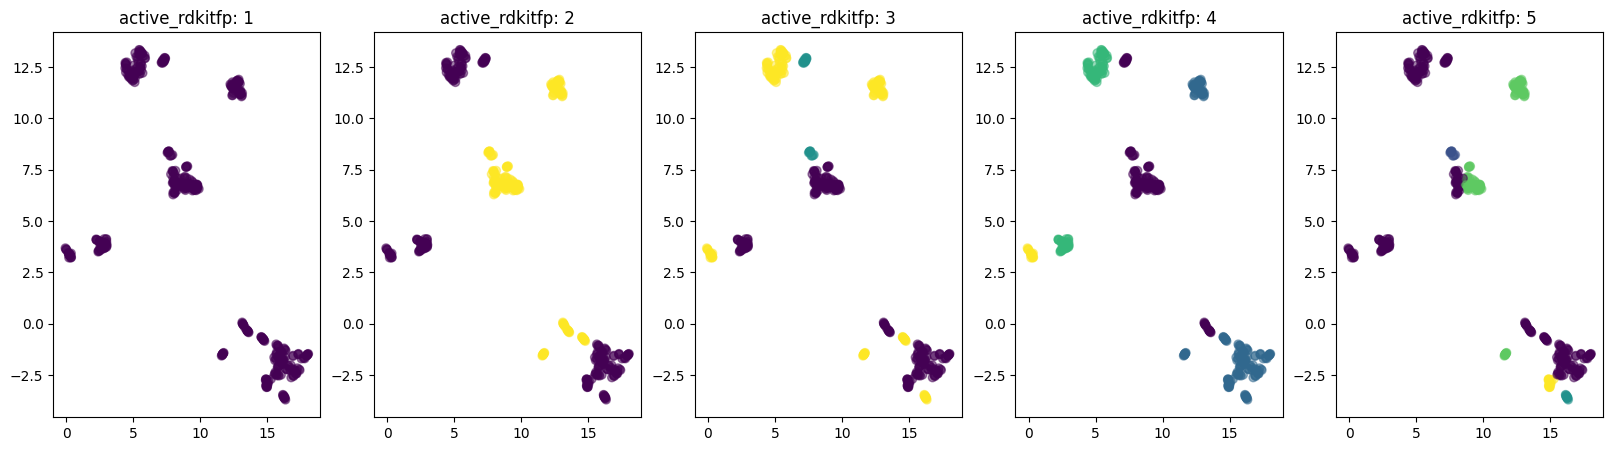

In [765]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df_sc_active_rdkitfp['UMAP1'], y=df_sc_active_rdkitfp['UMAP2'], c=df_sc_active_rdkitfp[f'SpectralCluster_{i}'], alpha=0.5)
    ax.set_title(f'active_rdkitfp: {i}')

In [766]:
inactive_umapper_morganfp = umapper.fit_transform(df_morgan_inactive.drop(columns='cid'))

In [767]:
df_sc_inactive_mfptsfp = pd.concat([df_inactive, pd.DataFrame(inactive_umapper_morganfp)], axis=1)
for i in range(1, 3):
    df_sc_inactive_mfptsfp.rename(columns={df_sc_inactive_mfptsfp.columns[-i]: f'UMAP{3 - i}'}, inplace=True)


for k in range (1,6):
    inactive_sc = SpectralClustering(n_clusters = k, affinity ='nearest_neighbors')
    inactive_sc.fit(inactive_umapper_morganfp)
    df_sc_inactive_mfptsfp[f'SpectralCluster_{k}'] = inactive_sc.labels_
    
df_sc_inactive_mfptsfp

,cid,smiles,bioactivity,type,value (nM),pIC50,UMAP1,UMAP2,SpectralCluster_1,SpectralCluster_2,SpectralCluster_3,SpectralCluster_4,SpectralCluster_5
0,118159250,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,10400.0,4.982967,11.430433,7.068182,0,1,0,1,1
1,118159264,CC1Cc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc4F)CC3)nc2...,Inactive,IC50,10400.0,4.982967,13.002364,9.897103,0,0,1,0,3
2,118159387,CC(C)Nc1nc2c(nc1N1CCC([C@H](F)c3ccc(F)cc3F)CC1...,Inactive,IC50,11400.0,4.943095,8.641104,5.050490,0,1,0,3,0
3,118159394,CC(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc4F)C...,Inactive,IC50,11500.0,4.939302,13.564080,9.026893,0,0,1,0,3
4,118159402,COc1ccc(OC2CCN(c3nc4c(nc3NC3CCC3)CCN(C(C)=O)C4...,Inactive,IC50,12000.0,4.920819,9.923817,7.321868,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,340200.0,3.468266,11.912655,6.270306,0,1,0,1,1
131,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,Inactive,IC50,341500.0,3.466609,10.197135,5.594361,0,1,0,1,1
132,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,Inactive,IC50,362900.0,3.440213,8.890761,6.898534,0,1,2,2,2
133,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,391000.0,3.407823,12.177370,6.625801,0,1,0,1,1


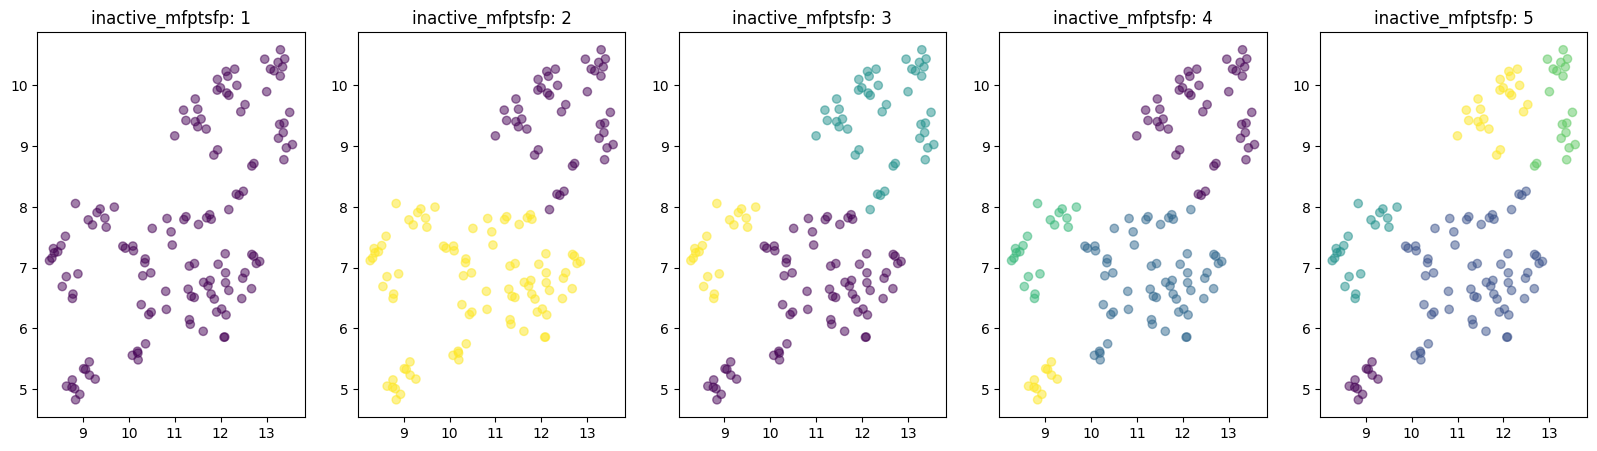

In [768]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df_sc_inactive_mfptsfp['UMAP1'], y=df_sc_inactive_mfptsfp['UMAP2'], c=df_sc_inactive_mfptsfp[f'SpectralCluster_{i}'], alpha=0.5)
    ax.set_title(f'inactive_mfptsfp: {i}')

In [769]:
inactive_umapper_rdkitfp = umapper.fit_transform(df_rdkit_inactive.drop(columns='cid'))

In [770]:
df_sc_inactive_rdkitfp = pd.concat([df_inactive, pd.DataFrame(inactive_umapper_rdkitfp)], axis=1)
for i in range(1, 3):
    df_sc_inactive_rdkitfp.rename(columns={df_sc_inactive_rdkitfp.columns[-i]: f'UMAP{3 - i}'}, inplace=True)


for k in range (1,6):
    inactive_sc = SpectralClustering(n_clusters = k, affinity ='nearest_neighbors')
    inactive_sc.fit(inactive_umapper_rdkitfp)
    df_sc_inactive_rdkitfp[f'SpectralCluster_{k}'] = inactive_sc.labels_
    
df_sc_inactive_rdkitfp

c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embeddin

,cid,smiles,bioactivity,type,value (nM),pIC50,UMAP1,UMAP2,SpectralCluster_1,SpectralCluster_2,SpectralCluster_3,SpectralCluster_4,SpectralCluster_5
0,118159250,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,10400.0,4.982967,6.971183,7.074195,0,1,1,2,1
1,118159264,CC1Cc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc4F)CC3)nc2...,Inactive,IC50,10400.0,4.982967,5.610653,3.642518,0,1,2,3,4
2,118159387,CC(C)Nc1nc2c(nc1N1CCC([C@H](F)c3ccc(F)cc3F)CC1...,Inactive,IC50,11400.0,4.943095,-0.889107,5.192483,0,1,0,1,2
3,118159394,CC(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc4F)C...,Inactive,IC50,11500.0,4.939302,4.568151,6.931022,0,0,1,0,0
4,118159402,COc1ccc(OC2CCN(c3nc4c(nc3NC3CCC3)CCN(C(C)=O)C4...,Inactive,IC50,12000.0,4.920819,3.944489,4.611032,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,340200.0,3.468266,3.781312,5.389388,0,0,1,0,0
131,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,Inactive,IC50,341500.0,3.466609,2.825471,5.539325,0,0,1,0,0
132,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,Inactive,IC50,362900.0,3.440213,1.439193,5.010092,0,0,1,0,0
133,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,391000.0,3.407823,6.848695,7.005296,0,1,1,2,1


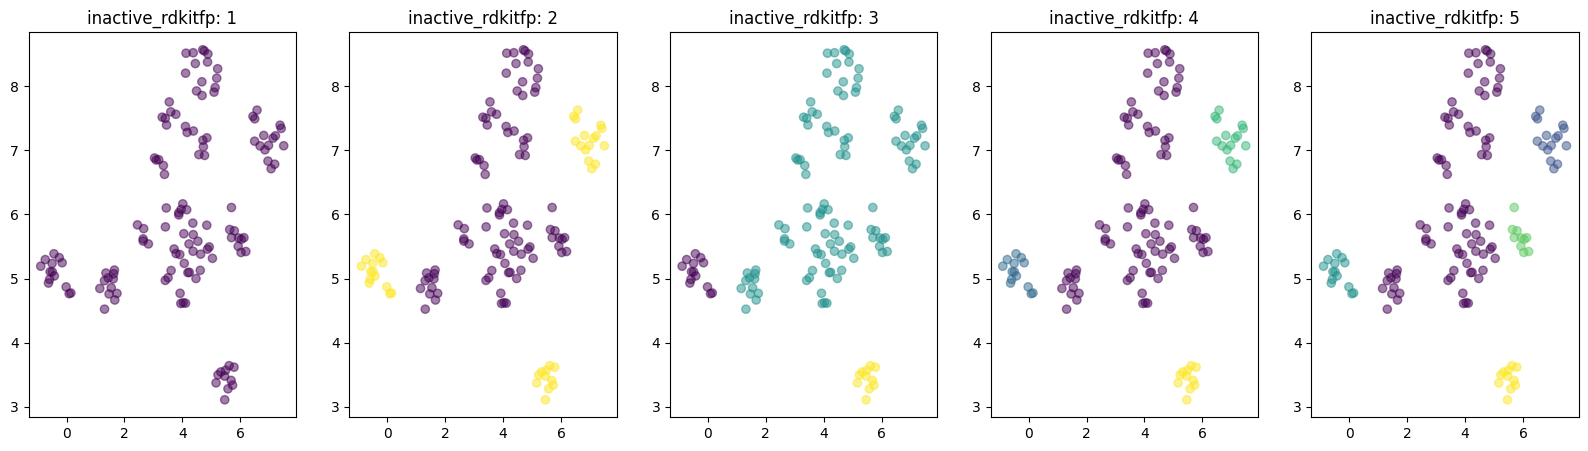

In [771]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df_sc_inactive_rdkitfp['UMAP1'], y=df_sc_inactive_rdkitfp['UMAP2'], c=df_sc_inactive_rdkitfp[f'SpectralCluster_{i}'], alpha=0.5)
    ax.set_title(f'inactive_rdkitfp: {i}')

In [772]:
def tanimoto_distance_matrix(fp_list):
    
    dissimilarity_matrix = []
    
    for i in range(1, len(fp_list)):
        
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

In [773]:
sim = DataStructs.TanimotoSimilarity(mfpts_active[0], mfpts_active[1])
print(f"Tanimoto similarity: {sim:.2f}, distance: {1-sim:.2f}")

Tanimoto similarity: 1.00, distance: 0.00


In [774]:
tanimoto_distance_matrix(mfpts_active)[0:5]

[0.0,
 0.48809523809523814,
 0.48809523809523814,
 0.5955056179775281,
 0.5955056179775281]

In [775]:
n = len(mfpts_active)

elem_triangular_matr = (n * (n - 1)) / 2

print(
    f"Elements in the triangular matrix ({elem_triangular_matr:.0f}) ==",
    f"tanimoto_distance_matrix(mfpts) ({len(tanimoto_distance_matrix(mfpts_active))})",
)

Elements in the triangular matrix (100576) == tanimoto_distance_matrix(mfpts) (100576)


In [776]:
from rdkit.ML.Cluster import Butina

In [777]:
def cluster_mfpts(fingerprints, cutoff=0.3):

    distance_matrix = tanimoto_distance_matrix(mfpts_active)
    clusters = Butina.ClusterData(distance_matrix, len(mfpts_active), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

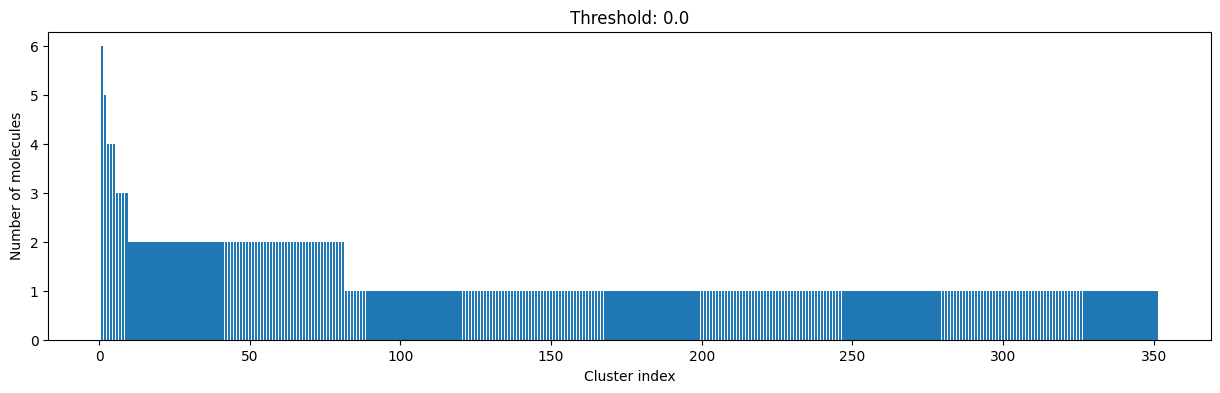

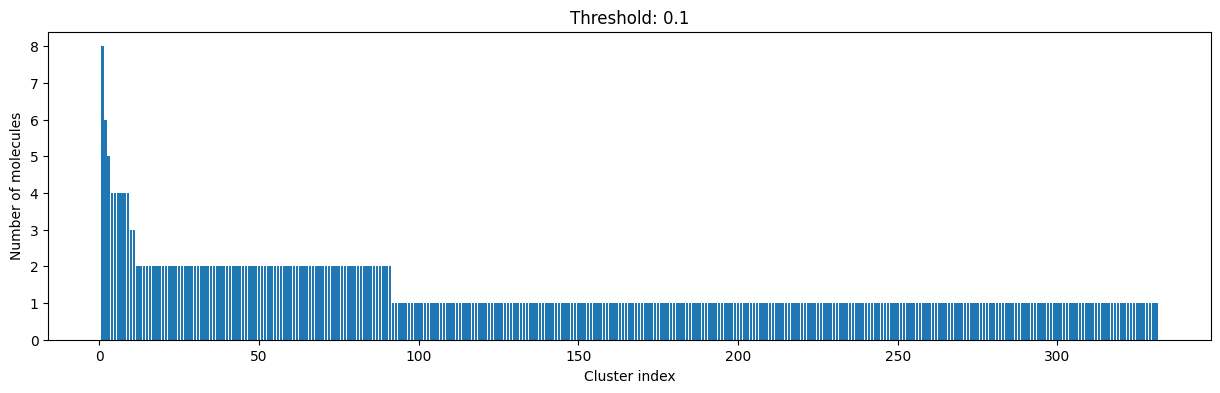

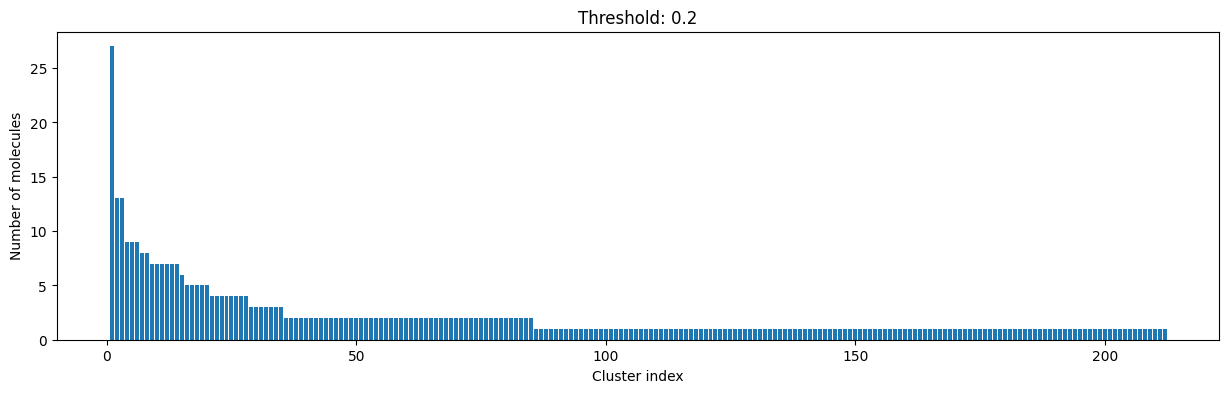

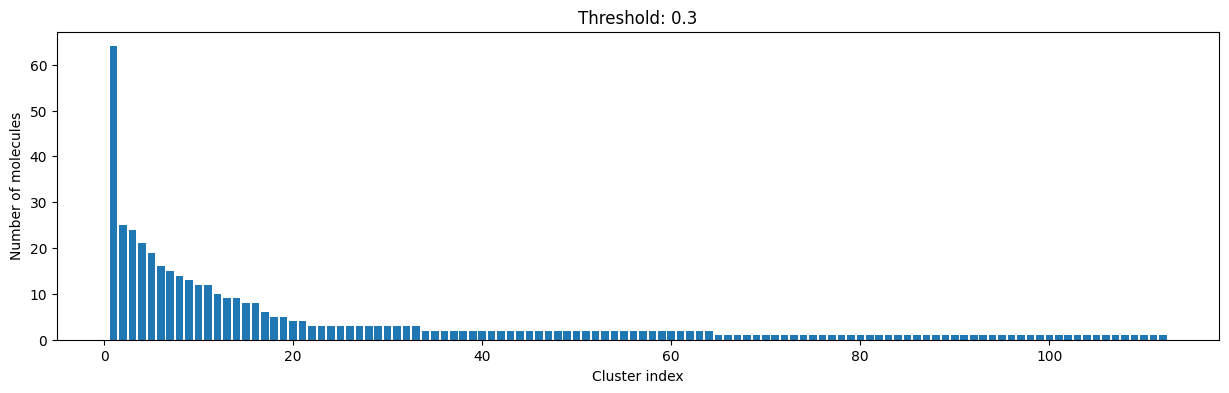

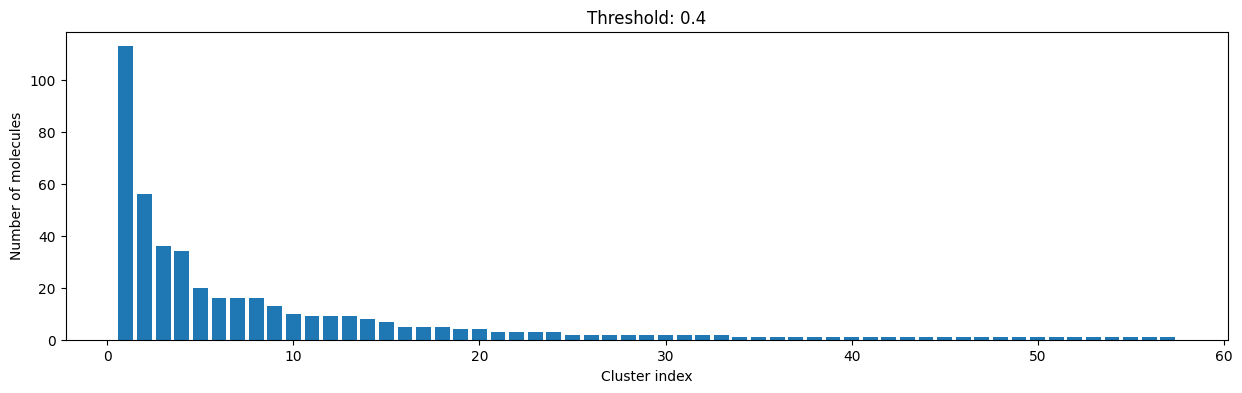

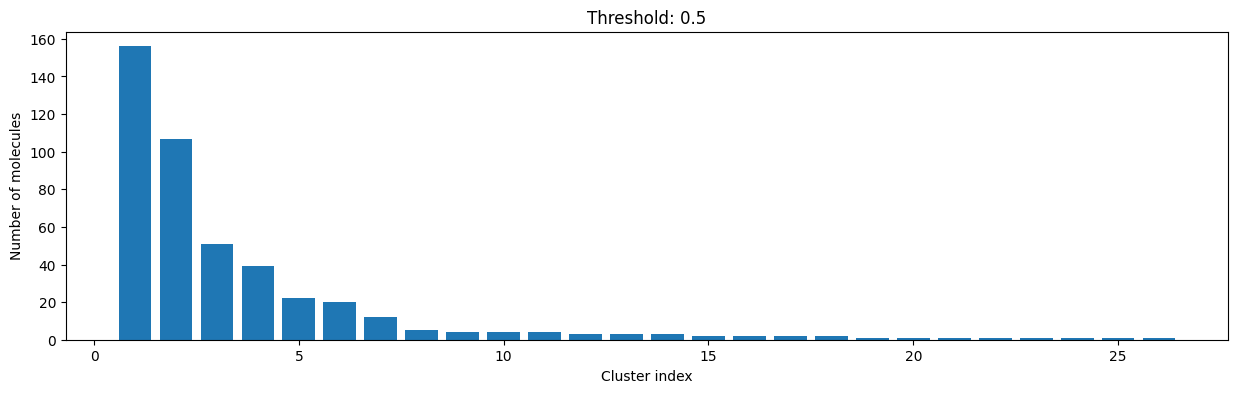

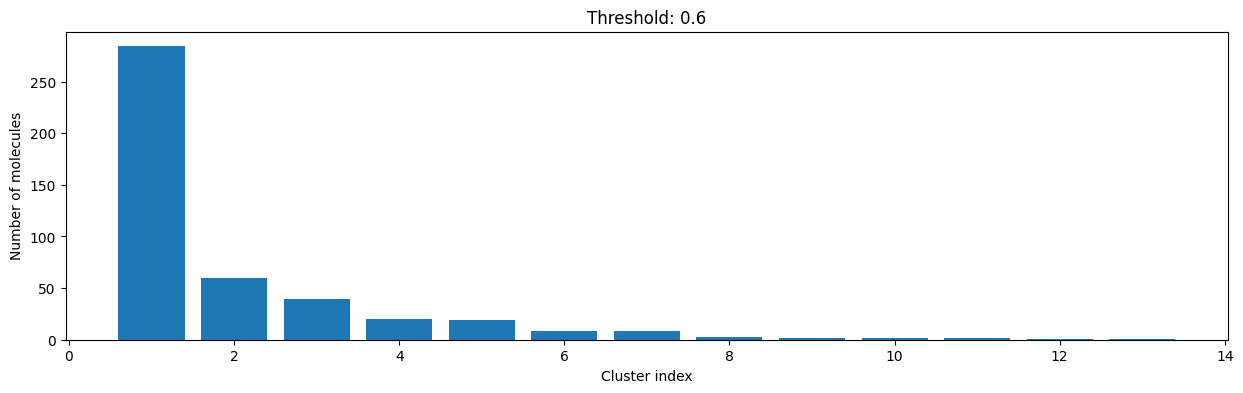

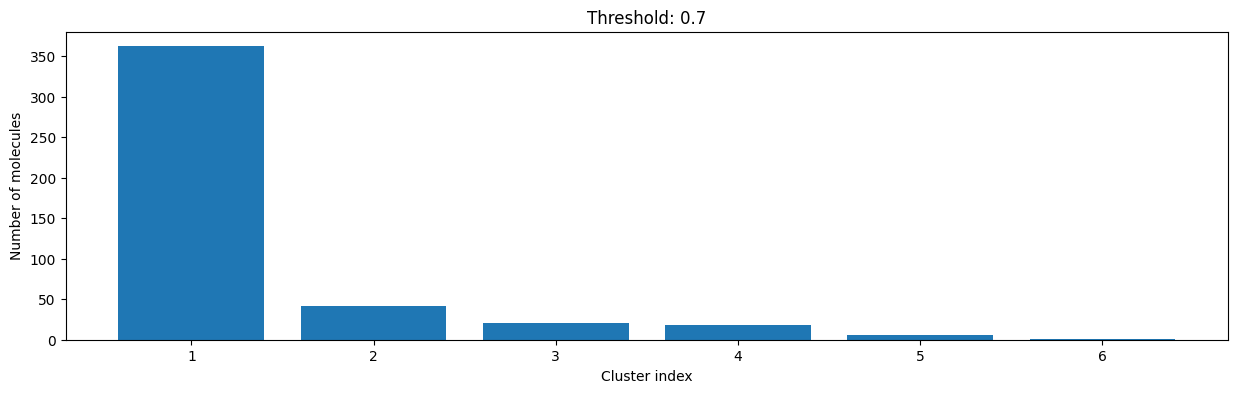

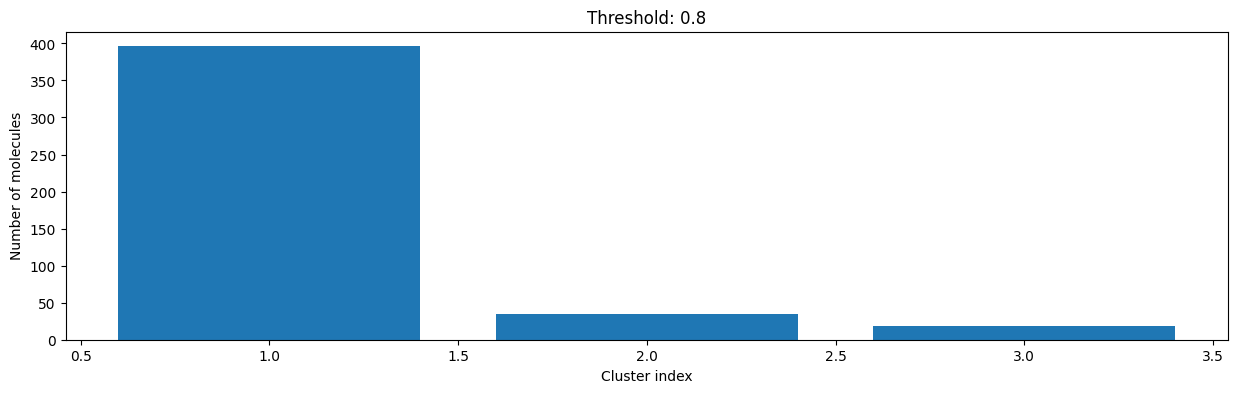

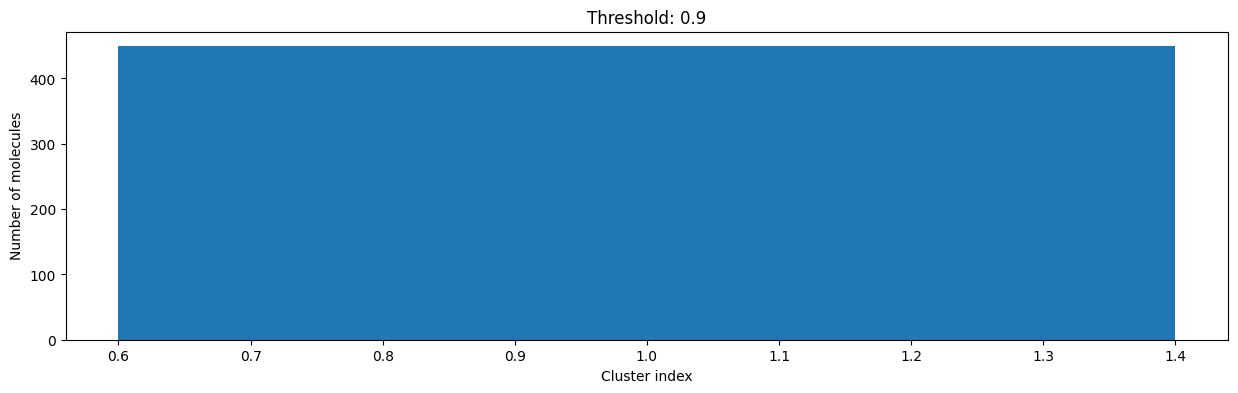

In [778]:
for cutoff in np.arange(0.0, 1.0, 0.1):
    clusters = cluster_mfpts(mfpts_active, cutoff=cutoff)
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_title(f"Threshold: {cutoff:3.1f}")
    ax.set_xlabel("Cluster index")
    ax.set_ylabel("Number of molecules")
    ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)
    plt.show()

Number of clusters: 212 from 449 molecules at distance cut-off 0.20
Number of molecules in first cluster: 27
Number of molecules in second cluster: 13
Number of molecules in third cluster: 13
Similarity between two random points in same cluster: 0.98
Similarity between two random points in different cluster: 0.68
# clusters with only 1 compound:  127
# clusters with >5 compounds:  15
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


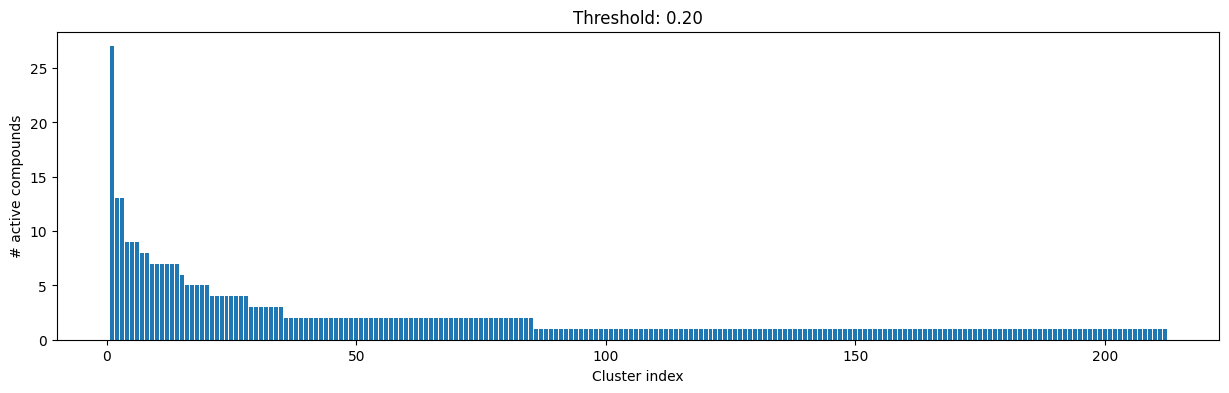

In [779]:
cutoff = 0.2
clusters_active = cluster_mfpts(mfpts_active, cutoff=cutoff)

fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Cluster index")
ax.set_ylabel("# active compounds")
ax.bar(range(1, len(clusters_active) + 1), [len(c) for c in clusters_active])
ax.set_title(f"Threshold: {cutoff:3.2f}")

print(
    f"Number of clusters: {len(clusters_active)} from {len(active_compounds)} molecules at distance cut-off {cutoff:.2f}"
)
print("Number of molecules in first cluster:", len(clusters_active[0]))
print("Number of molecules in second cluster:", len(clusters_active[1]))
print("Number of molecules in third cluster:", len(clusters_active[2]))
print(
    f"Similarity between two random points in same cluster: {DataStructs.TanimotoSimilarity(mfpts_active[clusters_active[0][0]], mfpts_active[clusters_active[0][1]]):.2f}"
)
print(
    f"Similarity between two random points in different cluster: {DataStructs.TanimotoSimilarity(mfpts_active[clusters_active[0][0]], mfpts_active[clusters_active[1][0]]):.2f}"
)

num_clust_g1 = sum(1 for c in clusters_active if len(c) == 1)
num_clust_g5 = sum(1 for c in clusters_active if len(c) > 5)
num_clust_g25 = sum(1 for c in clusters_active if len(c) > 25)
num_clust_g100 = sum(1 for c in clusters_active if len(c) > 100)

print("# clusters with only 1 compound: ", num_clust_g1)
print("# clusters with >5 compounds: ", num_clust_g5)
print("# clusters with >25 compounds: ", num_clust_g25)
print("# clusters with >100 compounds: ", num_clust_g100)

In [780]:
print("Ten molecules from largest cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds2["Structure"][i] for i in clusters[0][:9]],
    molsPerRow=3,
    #highlightAtomLists=[mol.GetSubstructMatch(core) for mol in compounds["Structure"]],
    #subImgSize=(450, 150),
    legends=[
        f"{compounds2['bioactivity'][i]}, pIC50 = {compounds2['pIC50'][i]:.4f}"
        for i in clusters[0][:10]]
)

Ten molecules from largest cluster:


NameError: name 'compounds2' is not defined

In [ ]:
print("Ten molecules from second cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds2["Structure"][i] for i in clusters[1][:9]],
    molsPerRow=3,
    legends=[
        f"{compounds2['bioactivity'][i]}, pIC50 = {compounds2['pIC50'][i]:.4f}"
        for i in clusters[1][:10]]
)

Ten molecules from second cluster:


IndexError: list index out of range

In [ ]:
print("Ten molecules from third cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds2["Structure"][i] for i in clusters[2][:9]],
    molsPerRow=3,
    legends=[
        f"{compounds2['bioactivity'][i]}, pIC50 = {compounds2['pIC50'][i]:.4f}"
        for i in clusters[2][:10]]
)

In [ ]:
Draw.MolsToGridImage(
    [compounds2["Structure"][clusters[i][0]] for i in range(3)],
    molsPerRow=6,
    legends=[
        f"{compounds2['bioactivity'][clusters[i][0]]}, pIC50 = {compounds2['pIC50'][clusters[i][0]]:.4f}"
        for i in range(3)]
)

In [ ]:
! pip install umap-learn
! pip install "umap-learn[plot]